In [12]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

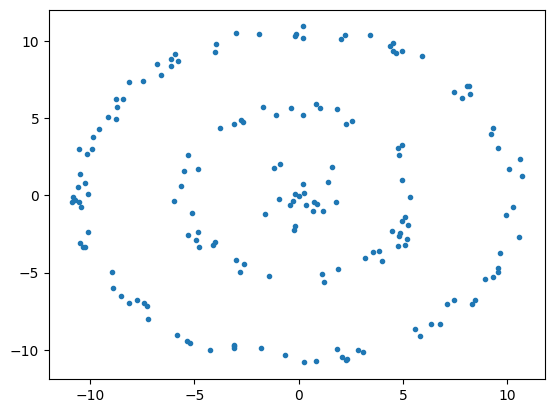

In [62]:
# Read datas

unarr_datas = []
with open('datas/circle3_sparse.txt', 'r') as in_file:
    raw_datas = in_file.readlines()
    for line in raw_datas:
        points = list(map(float, line.split()))
        unarr_datas.append(np.array([points[1], points[2]]))

datas = np.array(unarr_datas)
N = len(datas)

plt.scatter(datas[:, 0], datas[:, 1], marker='.')
plt.show

In [63]:
# Compute K, P, D matrices

euclidean_distance = lambda X, Y: np.linalg.norm(X - Y)

def gaussian_kernal(X, Y, sigma):
    distance = euclidean_distance(X, Y)
    result = np.exp(-distance ** 2 / sigma)
    return result

def get_K(points, sigma, t):
    K = []
    for i in range(N):
        row = [gaussian_kernal(datas[i], datas[j], sigma) for j in range(N)]
        K.append(np.array(row))

    A = np.eye(N)
    for _ in range(t): A = A.dot(K)
    return np.array(A)

def get_P(K):
    normalize = lambda row, sum: np.array(list(map(lambda x: x/sum, row)))
        
    P = [normalize(row, sum(row)) for row in K]
    return np.array(P)

def get_D(P):
    def compute_with_row(P, i, j):
        sum = 0
        for k in range(N):
            sum += (P[i][k] - P[j][k]) ** 2
        return sum
    
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            D[i][j] = compute_with_row(P, i, j)
        D[i] = np.array(D[i])
    return np.array(D)

In [64]:
# color with Diffusion Distance with array
def get_d(P, index):
    def compute_with_row(P, i, j):
        sum = 0
        for k in range(N):
            sum += (P[i][k] - P[j][k]) ** 2
        return sum
    
    d = np.zeros(N)
    for j in range(N):
        d[j] = compute_with_row(P, index, j)
    return np.array(d)


def show_diffusion_distance(d, index):
    center_point = np.array(datas[index])
    distances = d
    
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(0, d.max())
    colors = cmap(norm(distances))
    
    fig, ax = plt.subplots()
    
    scatter = ax.scatter(datas[:, 0], datas[:, 1], color=colors, s=25)
    
    ax.scatter(center_point[0], center_point[1], color='red', s=100, label='Center')
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Distance from Center')
    
    ax.set_title('Points Colored by Diffusion Distance')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    
    plt.show()

K done
P done
d done


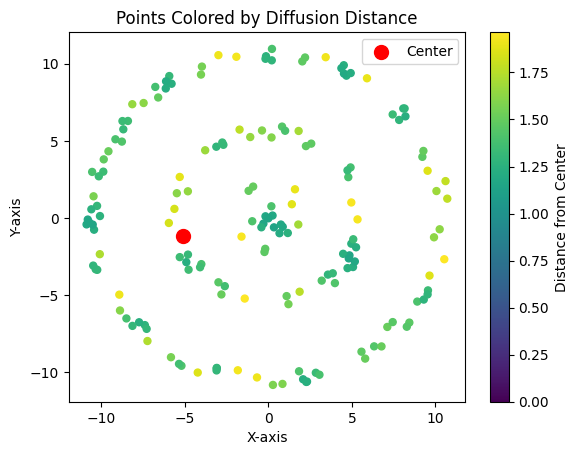

K done
P done
d done


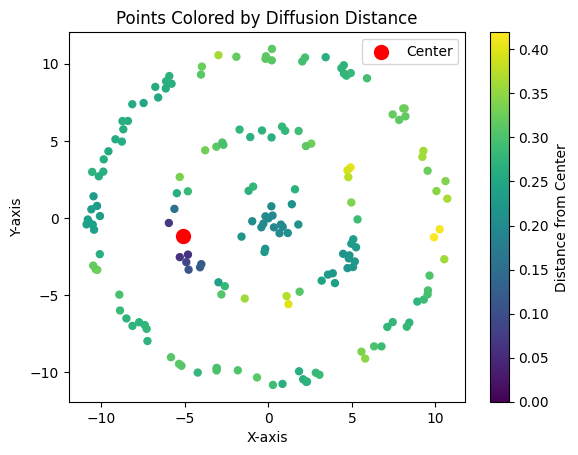

K done
P done
d done


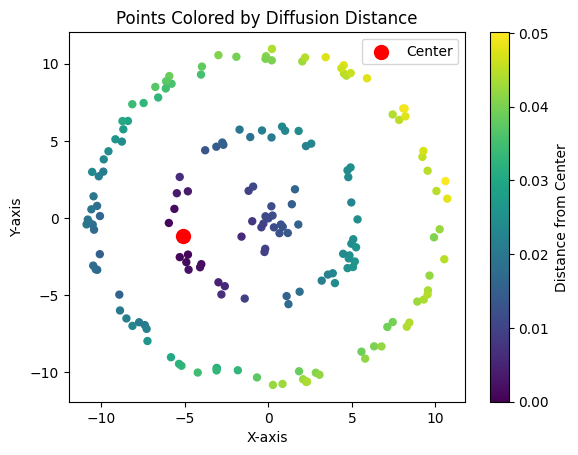

K done
P done
d done


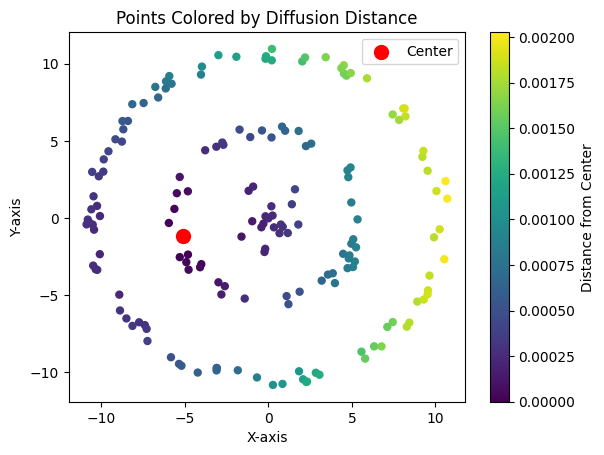

K done
P done
d done


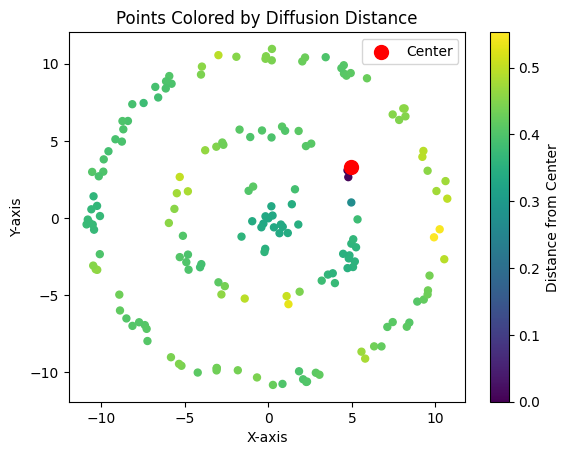

In [79]:
def test(index, sigma, t):
    K = get_K(datas, sigma=sigma, t=t)
    print('K done')
    P = get_P(K)
    print('P done')
    d = get_d(P, index)
    print('d done')
    show_diffusion_distance(d, index)

INDEX, SIGMA = 21, [0.3, 3, 30, 300]
for s in SIGMA:
    test(INDEX, s, 1)
test(24, 3, 1)

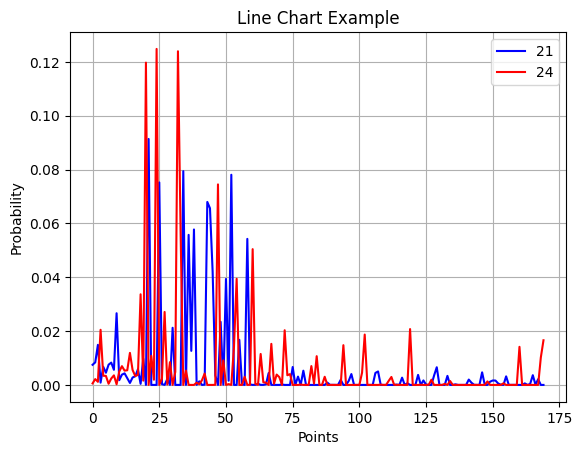

In [78]:
# show the row of the P matrix of two points

P = get_P(get_K(datas, sigma=10, t=1))

indeces = [i for i in range(1)]
indeces = [21, 24]
y = [P[index] for index in indeces]
x = np.array([i for i in range(N)])
COLOR = ['blue', 'red', 'brown', 'black', 'green']

for i in range(len(indeces)):
    plt.plot(x, y[i], '-',color=COLOR[i%5], label=f'{indeces[i]}')

plt.title('Line Chart Example')
plt.xlabel('Points')
plt.ylabel('Probability')

plt.legend()
plt.grid(True)
plt.show()